In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
HOME = os.environ['HOME']
sys.path.append(HOME + '/catkin_ws/src/fl4sr/src')

import matplotlib.pyplot as plt
import numpy as np
import pickle

from utils import *

np.set_printoptions(precision=4)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.style"] = 'normal'
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = 'normal'

## TXT: Main methods

In [95]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'I', 
    'SE', 
    'SN',
    'FL', 
]
identifiers_long = [
    'IDDPG', 
    'SEDDPG', 
    'SNDDPG', 
    'FLDDPG', 
]
individual_count = [
    8, 
    8, 
    8, 
    8,
]
world_count = 4
experiment_count = 32
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count[id], world_count, experiment_count)
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

IDDPG :
    Success rate: 0.12890625
    World success rate: [0.     0.1328 0.1328 0.25  ]
    Time: 20.765151515151516 +- 4.81539489630354
    Distance rate: 0.8854367718672119 +- 0.06809920160258434
SEDDPG :
    Success rate: 0.1494140625
    World success rate: [0.0039 0.125  0.2656 0.2031]
    Time: 23.03267973856209 +- 6.048883979228287
    Distance rate: 0.843429835725483 +- 0.07188231889602484
SNDDPG :
    Success rate: 0.28515625
    World success rate: [0.     0.5195 0.2539 0.3672]
    Time: 18.459589041095892 +- 3.264715447692256
    Distance rate: 0.9342071479392033 +- 0.021796844605652732
FLDDPG :
    Success rate: 0.154296875
    World success rate: [0.125  0.2383 0.0742 0.1797]
    Time: 27.8873417721519 +- 12.94571301006198
    Distance rate: 0.7938043428523051 +- 0.1461888913169369


Success rate


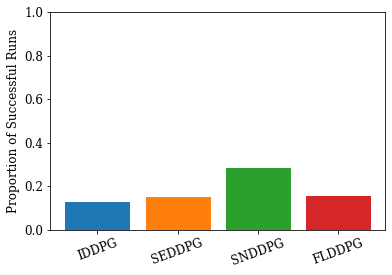

Time


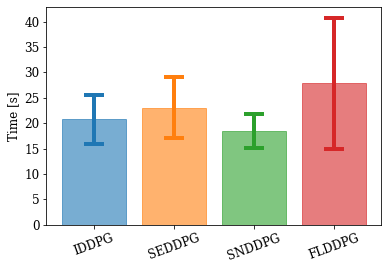

Distance factor


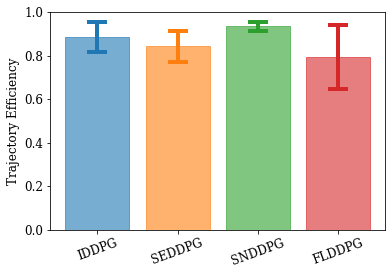

In [96]:
colors = plt.get_cmap('tab10')
C = 0
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index + C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index + C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
plt.savefig('eval_distance.png', dpi=200)
plt.show()

[]

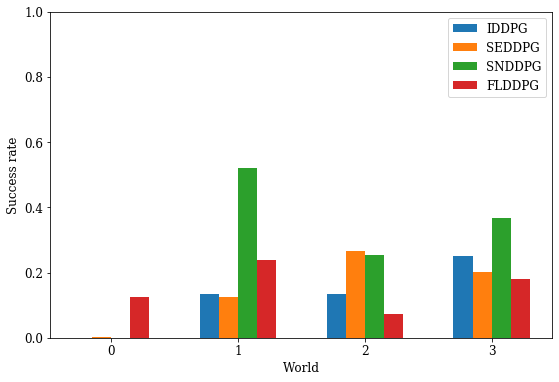

In [11]:
s_w_p_np = np.array(s_w_p)
x_s = np.arange(world_count)

plt.figure(figsize=(9, 6))

plt.bar(x_s - 0.075 - 0.15, s_w_p_np[0, :], 0.15, label=identifiers_long[0])
plt.bar(x_s - 0.075, s_w_p_np[1, :], 0.15, label=identifiers_long[1])
plt.bar(x_s + 0.075, s_w_p_np[2, :], 0.15, label=identifiers_long[2])
plt.bar(x_s + 0.075 + 0.15, s_w_p_np[3, :], 0.15, label=identifiers_long[3])

plt.xticks(x_s, x_s)
plt.xlabel('World')
plt.ylabel('Success rate')
plt.ylim(0, 1)
plt.legend()
plt.plot()

## Quick view

In [5]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'SN',
    'FL',
    'FLh', 
    'MAr',
    'PW',
    'All',
]
identifiers_long = [
    'SN',
    'FL',
    'FLhDDPG', 
    'GSDDPG',
    'PWDDPG',
    'AllDDPG',
]

individual_count = [
    8,
    8,
    8, 
    8,
    8,
    8,
]
world_count = 4
experiment_count = 32

total_count = individual_count * world_count * experiment_count
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count[id], world_count, experiment_count)
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

SN :
    Success rate: 0.28515625
    World success rate: [0.     0.5195 0.2539 0.3672]
    Time: 18.459589041095892 +- 3.264715447692256
    Distance rate: 0.9342071479392033 +- 0.021796844605652732
FL :
    Success rate: 0.154296875
    World success rate: [0.125  0.2383 0.0742 0.1797]
    Time: 27.8873417721519 +- 12.94571301006198
    Distance rate: 0.7938043428523051 +- 0.1461888913169369
FLhDDPG :
    Success rate: 0.275390625
    World success rate: [0.     0.2227 0.3633 0.5156]
    Time: 18.88581560283688 +- 2.3776017942958445
    Distance rate: 0.9113259361115774 +- 0.07467643736055657
GSDDPG :
    Success rate: 0.3701171875
    World success rate: [0.     0.3203 0.6758 0.4844]
    Time: 17.825593667546173 +- 0.8820127818206448
    Distance rate: 0.9402404879140207 +- 0.03315798522129641
PWDDPG :
    Success rate: 0.2216796875
    World success rate: [0.0039 0.2539 0.3438 0.2852]
    Time: 21.462995594713657 +- 4.186231450563842
    Distance rate: 0.8587624319017879 +- 0.10023

Success rate


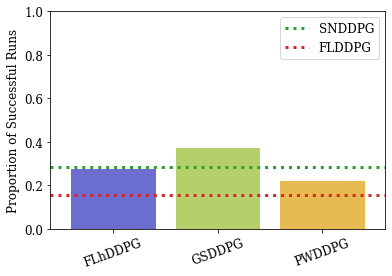

Time


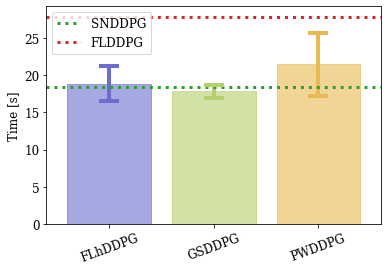

Distance factor


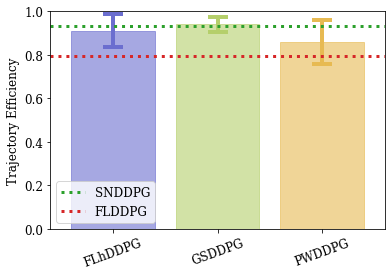

In [4]:
# pre-work
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')
C = 4
BASE = 2
s_w_p = np.array(s_w_p)

# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[0], s_p[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[1], s_p[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], s_p[BASE:])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.legend()
#plt.savefig('eval_imp_success.png', dpi=200)
plt.show()

# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[0], t_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[1], t_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], t_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Time [s]')
plt.legend()
#plt.savefig('eval_imp_time.png', dpi=200)
plt.show()

# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[0], d_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[1], d_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], d_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('eval_imp_distance.png', dpi=200)
plt.show()

## Hard update improvements

In [3]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'SN',
    'FL',
    'FLh', 
    'RW',
    'RWh',
]
identifiers_long = [
    'SN',
    'FL',
    'FLhDDPG', 
    'RWDDPG',
    'RWhDDPG',
]

individual_count = [
    8,
    8,
    8, 
    8,
    8,
]
world_count = 4
experiment_count = 32

total_count = individual_count * world_count * experiment_count
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count[id], world_count, experiment_count)
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

SN :
    Success rate: 0.28515625
    World success rate: [0.     0.5195 0.2539 0.3672]
    Time: 18.459589041095892 +- 3.264715447692256
    Distance rate: 0.9342071479392033 +- 0.021796844605652732
FL :
    Success rate: 0.154296875
    World success rate: [0.125  0.2383 0.0742 0.1797]
    Time: 27.8873417721519 +- 12.94571301006198
    Distance rate: 0.7938043428523051 +- 0.1461888913169369
FLhDDPG :
    Success rate: 0.275390625
    World success rate: [0.     0.2227 0.3633 0.5156]
    Time: 18.88581560283688 +- 2.3776017942958445
    Distance rate: 0.9113259361115774 +- 0.07467643736055657
RWDDPG :
    Success rate: 0.4287109375
    World success rate: [0.     0.7422 0.2344 0.7383]
    Time: 20.251252847380407 +- 9.616822391925773
    Distance rate: 0.9274003207427296 +- 0.0508964056039415
RWhDDPG :
    Success rate: 0.3037109375
    World success rate: [0.     0.5117 0.1562 0.5469]
    Time: 19.408360128617364 +- 3.738243420419192
    Distance rate: 0.9351550446573907 +- 0.026682

Success rate


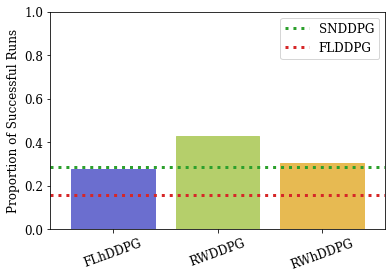

Time


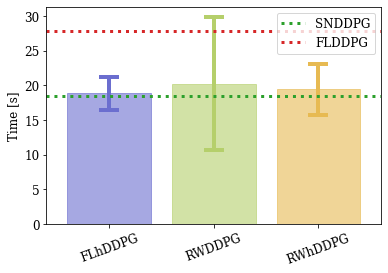

Distance factor


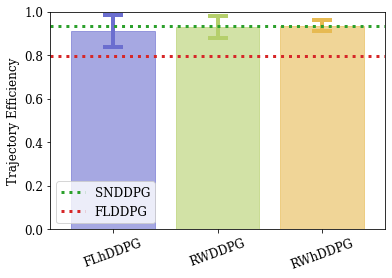

In [4]:
# pre-work
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')
C = 4
BASE = 2
s_w_p = np.array(s_w_p)

# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[0], s_p[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[1], s_p[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], s_p[BASE:])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.legend()
#plt.savefig('eval_imp_success.png', dpi=200)
plt.show()

# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[0], t_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[1], t_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], t_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Time [s]')
plt.legend()
#plt.savefig('eval_imp_time.png', dpi=200)
plt.show()

# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[0], d_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[1], d_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], d_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('eval_imp_distance.png', dpi=200)
plt.show()

## TXT: Improvements

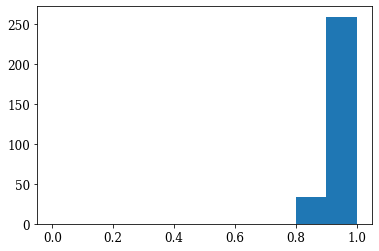

SNDDPG :
    Success rate: 0.28515625
    World success rate: [0.     0.5195 0.2539 0.3672]
    Time: 18.459589041095892 +- 3.264715447692256
    Distance rate: 0.9342071479392033 +- 0.021796844605652732


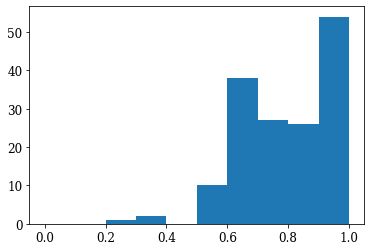

FLDDPG :
    Success rate: 0.154296875
    World success rate: [0.125  0.2383 0.0742 0.1797]
    Time: 27.8873417721519 +- 12.94571301006198
    Distance rate: 0.7938043428523051 +- 0.1461888913169369


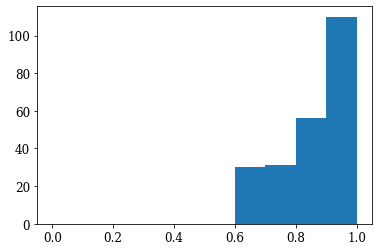

PWDDPG :
    Success rate: 0.2216796875
    World success rate: [0.0039 0.2539 0.3438 0.2852]
    Time: 21.462995594713657 +- 4.186231450563842
    Distance rate: 0.8587624319017879 +- 0.10023878833434635


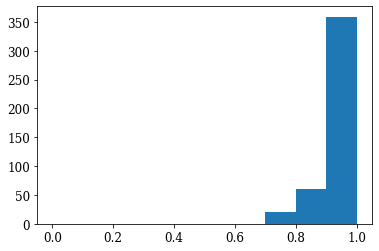

RWDDPG :
    Success rate: 0.4287109375
    World success rate: [0.     0.7422 0.2344 0.7383]
    Time: 20.251252847380407 +- 9.616822391925773
    Distance rate: 0.9274003207427296 +- 0.0508964056039415


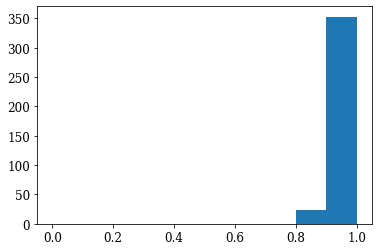

GSDDPG :
    Success rate: 0.3671875
    World success rate: [0.     0.3086 0.6953 0.4648]
    Time: 17.850531914893615 +- 0.8441599967099065
    Distance rate: 0.9394648287195962 +- 0.030700444860462372


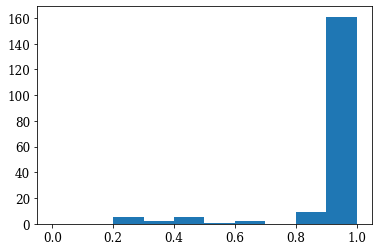

FLSDDPG :
    Success rate: 0.1806640625
    World success rate: [0.0078 0.2461 0.3242 0.1445]
    Time: 21.612432432432435 +- 12.969186226613054
    Distance rate: 0.8965264186405082 +- 0.15044117919934413


In [4]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'SN',
    'FL', 
    'PW', 
    'RW', 
    'MA', 
    'FLms',
    #'All',
]
identifiers_long = [
    'SNDDPG', 
    'FLDDPG', 
    'PWDDPG', 
    'RWDDPG', 
    'GSDDPG', 
    'FLSDDPG', 
    #'AllDDPG', 
]

individual_count = [
    8, 
    8, 
    8, 
    8, 
    8, 
    8,
    #8,
]
world_count = 4
experiment_count = 32

total_count = individual_count * world_count * experiment_count
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count[id], world_count, experiment_count)
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    plt.hist(distances, 10, range=(0, 1))
    plt.savefig('distance_histogram.png', dpi=200)
    plt.show()
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

Success rate


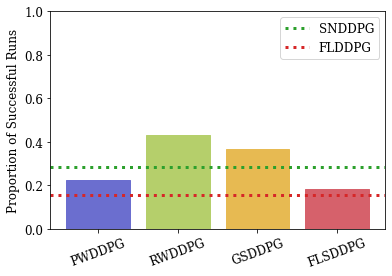

Time


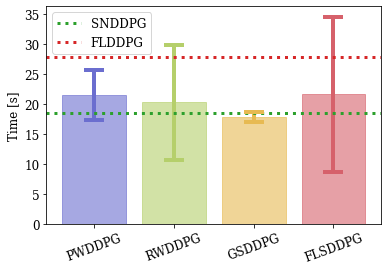

Distance factor


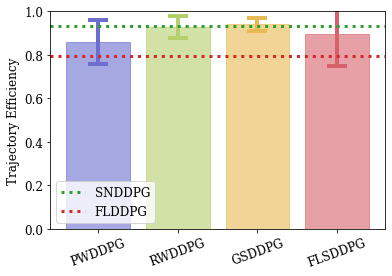

In [9]:
# pre-work
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')
C = 4
BASE = 2
s_w_p = np.array(s_w_p)

# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[0], s_p[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[1], s_p[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], s_p[BASE:])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.legend()
#plt.savefig('eval_imp_success.png', dpi=200)
plt.show()

# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[0], t_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[1], t_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], t_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Time [s]')
plt.legend()
#plt.savefig('eval_imp_time.png', dpi=200)
plt.show()

# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[0], d_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[1], d_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], d_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('eval_imp_distance.png', dpi=200)
plt.show()

## IDDPG Best Network

In [28]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'I0', 
    'I1', 
    'I2',
    'I3',
    'I4', 
]
identifiers_long = [
    'I0', 
    'I1', 
    'I2',
    'I3',
    'I4', 
]
individual_count = 8

world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count, world_count, experiment_count, 
                                                      single=True)
    # compute results
    total_count = world_count * experiment_count
    succeded_world_percentage = succeded_world / (experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

I0 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
I1 :
    Success rate: 0.0625
    World success rate: [0.   0.   0.   0.25]
    Time: 23.5 +- 0.0
    Distance rate: 0.747964982570331 +- 0.0
I2 :
    Success rate: 0.125
    World success rate: [0.  0.  0.  0.5]
    Time: 18.799999999999997 +- 0.40000000000000036
    Distance rate: 0.9434919599831357 +- 0.0021701679613691516
I3 :
    Success rate: 0.0625
    World success rate: [0.   0.   0.   0.25]
    Time: 19.6 +- 0.0
    Distance rate: 0.9245038618865247 +- 0.0
I4 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan


Success rate


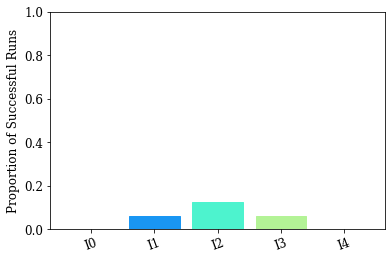

Time


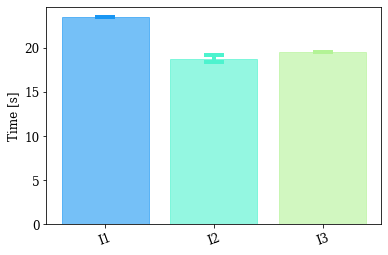

Distance factor


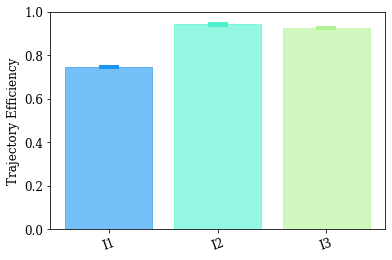

In [29]:
colors = plt.get_cmap('rainbow')
C = 1 / len(identifiers)
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
#plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

#### Selected networks:
| Learning run | Selected network |
| ---------------- | --------------- |
| 1 | 4 |
| 2 | 3 |
| 3 | 1 |
| 4 | 1 |
| 5 | 3 |
| 6 | 2 |
| 7 | 2 |
| 8 | 2 |


## SEDDPG Best Network

In [44]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'SE0', 
    'SE1', 
    'SE2',
    'SE3',
    'SE4', 
]
identifiers_long = [
    'SE0', 
    'SE1', 
    'SE2',
    'SE3',
    'SE4', 
]
individual_count = 8

world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count, world_count, experiment_count, 
                                                      single=True)
    # compute results
    total_count = world_count * experiment_count
    succeded_world_percentage = succeded_world / (experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

SE0 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
SE1 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
SE2 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
SE3 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
SE4 :
    Success rate: 0.25
    World success rate: [0. 0. 1. 0.]
    Time: 21.4 +- 0.43011626335213105
    Distance rate: 0.8629920597827343 +- 0.004337292493876721


Success rate


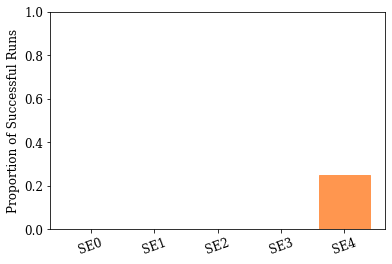

Time


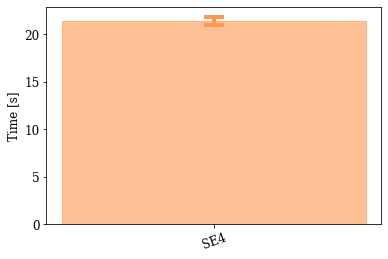

Distance factor


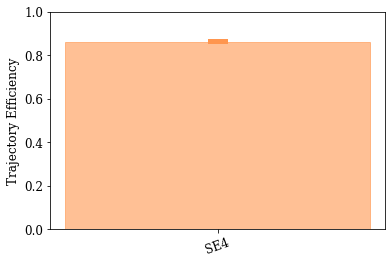

In [45]:
colors = plt.get_cmap('rainbow')
C = 1 / len(identifiers)
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
#plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

#### Selected networks:
| Learning run | Selected network |
| ---------------- | --------------- |
| 1 | 2 |
| 2 | 2 |
| 3 | 1 |
| 4 | 0, 2 |
| 5 | 0, 1, 2, 3, 4 |
| 6 | 4 |
| 7 | 3 |
| 8 | 4 |


## FLDDPG Best Network

In [120]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'FL0', 
    'FL1', 
    'FL2',
    'FL3',
    'FL4', 
]
identifiers_long = [
    'FL0', 
    'FL1', 
    'FL2',
    'FL3',
    'FL4', 
]
individual_count = 8

world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count, world_count, experiment_count, 
                                                      single=True)
    # compute results
    total_count = world_count * experiment_count
    succeded_world_percentage = succeded_world / (experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

FL0 :
    Success rate: 0.6875
    World success rate: [1.   1.   0.   0.75]
    Time: 25.545454545454547 +- 1.4767061850702712
    Distance rate: 0.6862307920491452 +- 0.04020398475986385
FL1 :
    Success rate: 0.25
    World success rate: [1. 0. 0. 0.]
    Time: 25.749999999999996 +- 0.20615528128088315
    Distance rate: 0.6943775806730323 +- 0.007892730410258038
FL2 :
    Success rate: 0.5
    World success rate: [1. 1. 0. 0.]
    Time: 26.012500000000003 +- 6.800815667991597
    Distance rate: 0.7822781582562539 +- 0.13802629743495604
FL3 :
    Success rate: 0.0625
    World success rate: [0.   0.   0.25 0.  ]
    Time: 44.9 +- 0.0
    Distance rate: 0.43369900482489454 +- 0.0
FL4 :
    Success rate: 0.25
    World success rate: [1. 0. 0. 0.]
    Time: 29.625 +- 0.7693341276714555
    Distance rate: 0.6866116091864793 +- 0.007334744176715288


Success rate


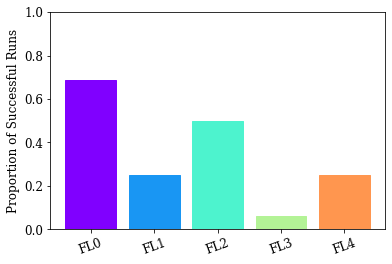

Time


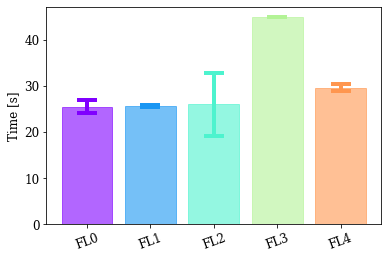

Distance factor


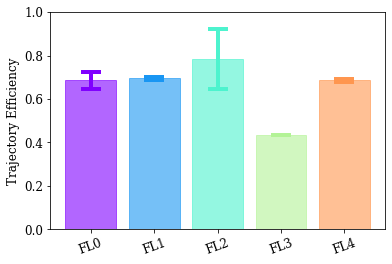

In [121]:
colors = plt.get_cmap('rainbow')
C = 1 / len(identifiers)
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
#plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

#### Selected networks:
| Learning run | Selected network |
| ---------------- | --------------- |
| 1 | 2 |
| 2 | 3 |
| 3 | 0 |
| 4 | 0, 1, 2, 3 |
| 5 | 3 |
| 6 | 0 |
| 7 | 1 |
| 8 | 0 |


## PWDDPG Best Network

In [20]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'PW0', 
    'PW1', 
    'PW2',
    'PW3',
    'PW4', 
]
identifiers_long = [
    'PW0', 
    'PW1', 
    'PW2',
    'PW3',
    'PW4', 
]
individual_count = 8

world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count, world_count, experiment_count, 
                                                      single=True)
    # compute results
    total_count = world_count * experiment_count
    succeded_world_percentage = succeded_world / (experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

PW0 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
PW1 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
PW2 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
PW3 :
    Success rate: 0.25
    World success rate: [0. 1. 0. 0.]
    Time: 23.625 +- 0.7693341276714555
    Distance rate: 0.7354234950175618 +- 0.002321883653341434
PW4 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan


Success rate


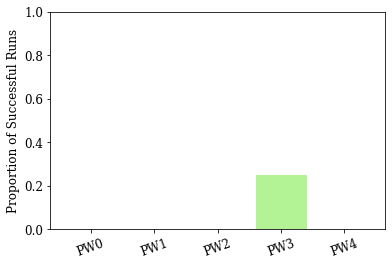

Time


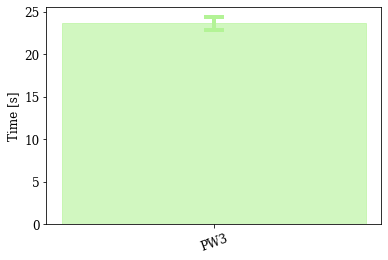

Distance factor


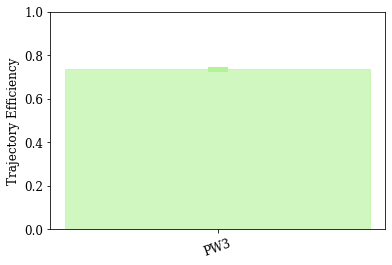

In [21]:
colors = plt.get_cmap('rainbow')
C = 1 / len(identifiers)
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
#plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

#### Selected networks:
| Learning run | Selected network |
| ---------------- | --------------- |
| 1 | 1 |
| 2 | 0 |
| 3 | 1 |
| 4 | 0, 1, 2, 3, 4 |
| 5 | 1 |
| 6 | 1, 4 |
| 7 | 0 |
| 8 | 3 |


## RWDDPG Best Network

In [17]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'RW0', 
    'RW1', 
    'RW2',
    'RW3',
    'RW4', 
]
identifiers_long = [
    'RW0', 
    'RW1', 
    'RW2',
    'RW3',
    'RW4', 
]
individual_count = 8

world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count, world_count, experiment_count, 
                                                      single=True)
    # compute results
    total_count = world_count * experiment_count
    succeded_world_percentage = succeded_world / (experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

RW0 :
    Success rate: 0.25
    World success rate: [0.   0.5  0.25 0.25]
    Time: 17.6 +- 0.25495097567963904
    Distance rate: 0.9580839737259819 +- 0.027526373323965833
RW1 :
    Success rate: 0.5
    World success rate: [0. 1. 0. 1.]
    Time: 18.012500000000003 +- 0.510973335899242
    Distance rate: 0.9562037638462558 +- 0.006549052263990145
RW2 :
    Success rate: 0.5
    World success rate: [0. 1. 0. 1.]
    Time: 17.987499999999997 +- 0.5555121510822243
    Distance rate: 0.9317092544572452 +- 0.01287505716984198
RW3 :
    Success rate: 0.125
    World success rate: [0.  0.5 0.  0. ]
    Time: 23.35 +- 0.8499999999999996
    Distance rate: 0.7955831925854339 +- 0.007096793021479253
RW4 :
    Success rate: 0.5
    World success rate: [0. 1. 0. 1.]
    Time: 17.5875 +- 0.4166458328124741
    Distance rate: 0.9511543835255833 +- 0.005511285990402932


Success rate


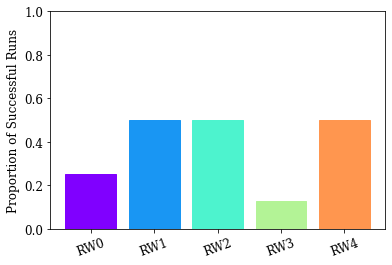

Time


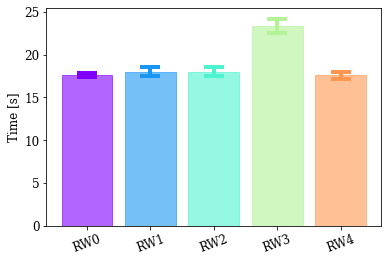

Distance factor


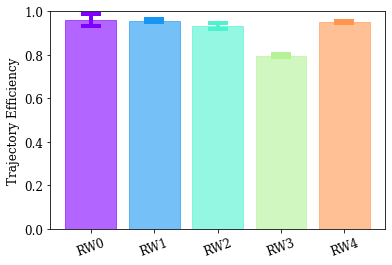

In [18]:
colors = plt.get_cmap('rainbow')
C = 1 / len(identifiers)
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
#plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

#### Selected networks:
| Learning run | Selected network |
| ---------------- | --------------- |
| 1 | 0, 3, 4 |
| 2 | 0, 3 |
| 3 | 0, 3, 4 |
| 4 | 0, 2, 4 |
| 5 | 4 |
| 6 | 2 |
| 7 | 0, 1, 2, 3, 4 |
| 8 | 1, 2 |


## GSDDPG Best Network

In [46]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'GS0', 
    'GS1', 
    'GS2',
    'GS3',
    'GS4', 
]
identifiers_long = [
    'GS0', 
    'GS1', 
    'GS2',
    'GS3',
    'GS4', 
]
individual_count = 8

world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count, world_count, experiment_count, 
                                                      single=True)
    # compute results
    total_count = world_count * experiment_count
    succeded_world_percentage = succeded_world / (experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

GS0 :
    Success rate: 0.6875
    World success rate: [0.   1.   0.75 1.  ]
    Time: 18.000000000000004 +- 0.8124038404635963
    Distance rate: 0.9525416440170414 +- 0.011568566281757888
GS1 :
    Success rate: 0.6875
    World success rate: [0.   1.   0.75 1.  ]
    Time: 18.40909090909091 +- 0.2574509501546599
    Distance rate: 0.9531930020516413 +- 0.008302842238568368
GS2 :
    Success rate: 0.6875
    World success rate: [0.   1.   0.75 1.  ]
    Time: 18.2 +- 0.5624621199366553
    Distance rate: 0.9548062694812676 +- 0.010702096269915447
GS3 :
    Success rate: 0.625
    World success rate: [0.  1.  0.5 1. ]
    Time: 17.860000000000003 +- 0.42708313008125287
    Distance rate: 0.9542992801898318 +- 0.010746794420287812
GS4 :
    Success rate: 0.625
    World success rate: [0.  1.  0.5 1. ]
    Time: 17.68 +- 0.499599839871872
    Distance rate: 0.9540970390290872 +- 0.011204027068697069


Success rate


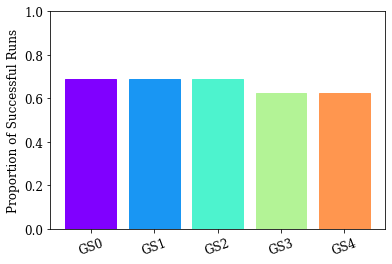

Time


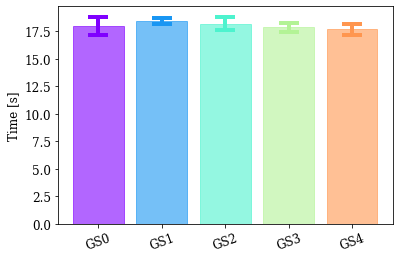

Distance factor


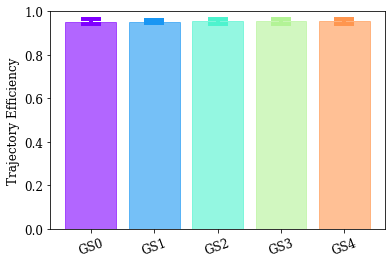

In [47]:
colors = plt.get_cmap('rainbow')
C = 1 / len(identifiers)
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
#plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

#### Selected networks:
| Learning run | Selected network |
| ---------------- | --------------- |
| 1 | 2 |
| 2 | 0, 1, 2, 3, 4 |
| 3 | 0, 3 |
| 4 | 2 |
| 5 | 0, 1, 2, 4 |
| 6 | 0, 1, 2, 3, 4 |
| 7 | 0, 1, 2, 3, 4 |
| 8 | 0, 1, 2 |


## FLSDDPG Best Network

In [71]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'FLS0', 
    'FLS1', 
    'FLS2',
    'FLS3',
    'FLS4', 
]
identifiers_long = [
    'FLS0', 
    'FLS1', 
    'FLS2',
    'FLS3',
    'FLS4', 
]
individual_count = 8

world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count, world_count, experiment_count, 
                                                      single=True)
    # compute results
    total_count = world_count * experiment_count
    succeded_world_percentage = succeded_world / (experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

FLS0 :
    Success rate: 0.25
    World success rate: [0.   0.   0.75 0.25]
    Time: 19.575000000000003 +- 1.2557368354874359
    Distance rate: 0.9110016072782637 +- 0.0389942872409599
FLS1 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
FLS2 :
    Success rate: 0.0625
    World success rate: [0.   0.25 0.   0.  ]
    Time: 36.5 +- 0.0
    Distance rate: 0.7730530724230983 +- 0.0
FLS3 :
    Success rate: 0.0
    World success rate: [0. 0. 0. 0.]
    Time: nan +- nan
    Distance rate: nan +- nan
FLS4 :
    Success rate: 0.0625
    World success rate: [0.   0.   0.   0.25]
    Time: 18.5 +- 0.0
    Distance rate: 0.9587723725509188 +- 0.0


Success rate


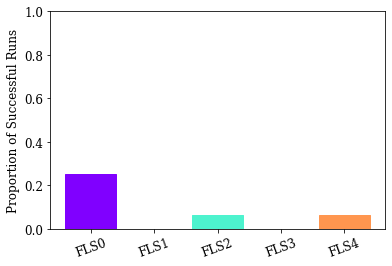

Time


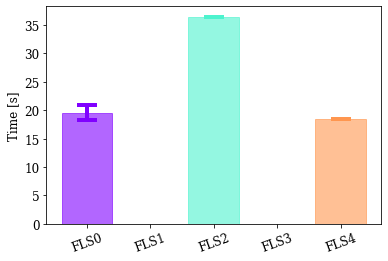

Distance factor


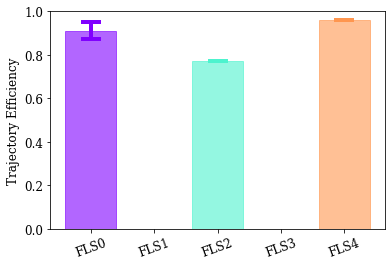

In [72]:
colors = plt.get_cmap('rainbow')
C = 1 / len(identifiers)
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
#plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index*C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

#### Selected networks:
| Learning run | Selected network |
| ---------------- | --------------- |
| 1 | 0 |
| 2 | 3 |
| 3 | 3 |
| 4 | 2 |
| 5 | 2, 3 |
| 6 | 0, 1 |
| 7 | 1 |
| 8 | 0 |


## Main Methods All Networks

In [7]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'I', 
    'SE', 
    'FL', 
]
identifiers_long = [
    'IDDPG', 
    'SEDDPG', 
    'FLDDPG', 
]
individual_count = [
    8, 
    8, 
    8,
]
network_count = 5
world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    succeded_world = np.zeros(world_count)
    steps = np.array([])
    distances = np.array([])
    for nid in range(network_count):
        # evaluation results
        succeded_world_n, steps_n, distances_n = get_evaluation(path_data, iid+str(nid), 
                                                        individual_count[id], world_count, experiment_count)
        succeded_world += succeded_world_n
        steps = np.concatenate((steps, steps_n))
        distances = np.concatenate((distances, distances_n))
    # compute results
    total_count = individual_count[id] * world_count * experiment_count * network_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count * network_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

IDDPG :
    Success rate: 0.1078125
    World success rate: [0.025  0.1125 0.0938 0.2   ]
    Time: 22.11304347826087 +- 4.822108296004922
    Distance rate: 0.8538817357802688 +- 0.10907245434581819
SEDDPG :
    Success rate: 0.1140625
    World success rate: [0.025  0.1437 0.1938 0.0938]
    Time: 21.897260273972602 +- 7.367904715125023
    Distance rate: 0.8759206149206278 +- 0.09841684028518677
FLDDPG :
    Success rate: 0.2515625
    World success rate: [0.1    0.3875 0.25   0.2687]
    Time: 21.390062111801242 +- 7.129252179724382
    Distance rate: 0.8703978824439398 +- 0.10324925035279987


In [8]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'SN',
]
identifiers_long = [
    'SNDDPG', 
]
individual_count = [
    8,
]
world_count = 4
experiment_count = 20
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count[id], world_count, experiment_count)
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.insert(2, succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.insert(2, succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.insert(2, time_mean)
    time_std = np.std(steps / 10)
    t_s.insert(2, time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.insert(2, distances_mean)
    distances_std = np.std(distances)
    d_s.insert(2, distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

SNDDPG :
    Success rate: 0.2859375
    World success rate: [0.     0.525  0.2562 0.3625]
    Time: 18.549180327868854 +- 4.004353762458251
    Distance rate: 0.9341025349317003 +- 0.021735575375823806


Success rate


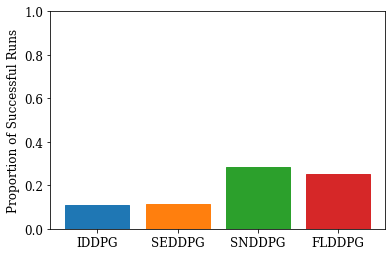

Time


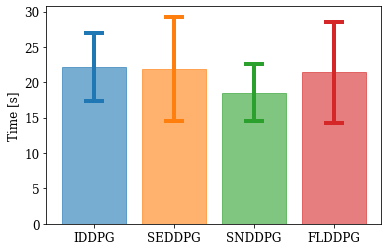

Distance factor


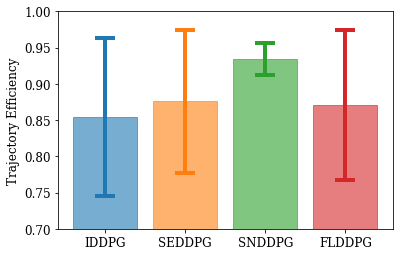

In [11]:
identifiers_long = [
    'IDDPG', 
    'SEDDPG',
    'SNDDPG', 
    'FLDDPG', 
]
colors = plt.get_cmap('tab10')
C = 0
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
#plt.xticks(rotation=20)
plt.savefig('eval_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index + C))
#plt.xticks(rotation=20)
plt.ylabel('Time [s]')
plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index + C))
#plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0.7, 1)
plt.savefig('eval_distance.png', dpi=200)
plt.show()

## Main Methods Best Network

In [3]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'I', 
    'SE', 
    'FL', 
]
identifiers_long = [
    'IDDPG', 
    'SEDDPG', 
    'FLDDPG', 
]
individual_count = [
    8, 
    8, 
    8,
]
network_count = [
    [4, 3, 1, 1, 3, 2, 2, 2],
    [2, 2, 1, 0, 0, 4, 3, 4],
    [2, 3, 0, 0, 3, 0, 1, 0],
]
world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    succeded_world = np.zeros(world_count)
    steps = np.array([])
    distances = np.array([])
    for inid, nid in enumerate(network_count[id]):
        # evaluation results
        succeded_world_n, steps_n, distances_n = get_evaluation(path_data, iid+str(nid), 
                                                        inid+1, world_count, experiment_count,
                                                        single=True)
        #print(iid+str(nid), '    ', inid+1)
        succeded_world += succeded_world_n
        steps = np.concatenate((steps, steps_n))
        distances = np.concatenate((distances, distances_n))
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

IDDPG :
    Success rate: 0.3828125
    World success rate: [0.125  0.5    0.375  0.5312]
    Time: 22.371428571428574 +- 5.071891326975871
    Distance rate: 0.8541362116915011 +- 0.10646126218059554
SEDDPG :
    Success rate: 0.2890625
    World success rate: [0.125  0.3125 0.5625 0.1562]
    Time: 20.97567567567567 +- 3.187425073239594
    Distance rate: 0.8679693548502445 +- 0.11457815157669343
FLDDPG :
    Success rate: 0.484375
    World success rate: [0.125  0.75   0.375  0.6875]
    Time: 20.30322580645161 +- 3.6656631553330548
    Distance rate: 0.8672852191271406 +- 0.11329256486746886


In [4]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'SN',
]
identifiers_long = [
    'SNDDPG', 
]
individual_count = [
    8,
]
world_count = 4
experiment_count = 20
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count[id], world_count, experiment_count)
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.insert(2, succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.insert(2, succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.insert(2, time_mean)
    time_std = np.std(steps / 10)
    t_s.insert(2, time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.insert(2, distances_mean)
    distances_std = np.std(distances)
    d_s.insert(2, distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

SNDDPG :
    Success rate: 0.2859375
    World success rate: [0.     0.525  0.2562 0.3625]
    Time: 18.549180327868854 +- 4.004353762458251
    Distance rate: 0.9341025349317003 +- 0.021735575375823806


Success rate


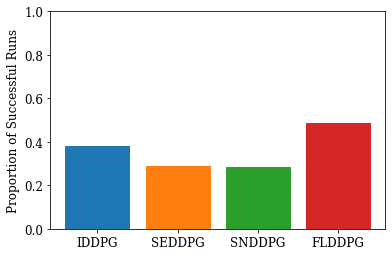

Time


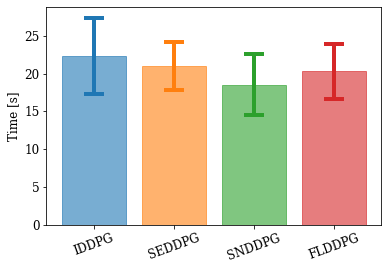

Distance factor


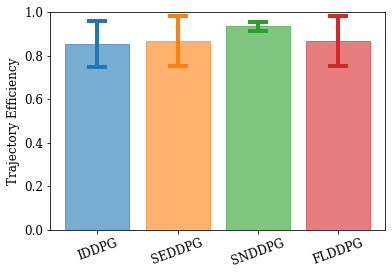

In [6]:
identifiers_long = [
    'IDDPG', 
    'SEDDPG',
    'SNDDPG', 
    'FLDDPG', 
]
colors = plt.get_cmap('tab10')
C = 0
s_w_p = np.array(s_w_p)
# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
bar_list = plt.bar(identifiers_long, s_p)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
#plt.xticks(rotation=20)
plt.savefig('eval_best_success.png', dpi=200)
plt.show()
# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, t_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors(index + C))
plt.xticks(rotation=20)
plt.ylabel('Time [s]')
#plt.savefig('eval_time.png', dpi=200)
plt.show()
# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
bar_list = plt.bar(identifiers_long, d_m, alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index + C))
for index in range(len(identifiers_long)):
    ax.errorbar(index, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors(index + C))
plt.xticks(rotation=20)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
#plt.savefig('eval_distance.png', dpi=200)
plt.show()

## Improvements All Networks

In [12]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'SN',
]
identifiers_long = [
    'SNDDPG', 
]
individual_count = [
    8,
]
world_count = 4
experiment_count = 20
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    # evaluation results
    succeded_world, steps, distances = get_evaluation(path_data, iid, 
                                                      individual_count[id], world_count, experiment_count)
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

SNDDPG :
    Success rate: 0.2859375
    World success rate: [0.     0.525  0.2562 0.3625]
    Time: 18.549180327868854 +- 4.004353762458251
    Distance rate: 0.9341025349317003 +- 0.021735575375823806


In [13]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'FL', 
]
identifiers_long = [
    'FLDDPG', 
]
individual_count = [
    8,
]
network_count = 5
world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

for id, iid in enumerate(identifiers):
    succeded_world = np.zeros(world_count)
    steps = np.array([])
    distances = np.array([])
    for nid in range(network_count):
        # evaluation results
        succeded_world_n, steps_n, distances_n = get_evaluation(path_data, iid+str(nid), 
                                                        individual_count[id], world_count, experiment_count)
        succeded_world += succeded_world_n
        steps = np.concatenate((steps, steps_n))
        distances = np.concatenate((distances, distances_n))
    # compute results
    total_count = individual_count[id] * world_count * experiment_count * network_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count * network_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

FLDDPG :
    Success rate: 0.2515625
    World success rate: [0.1    0.3875 0.25   0.2687]
    Time: 21.390062111801242 +- 7.129252179724382
    Distance rate: 0.8703978824439398 +- 0.10324925035279987


In [14]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'PW', 
    'RW', 
    'GS', 
    'FLS', 
]
identifiers_long = [
    'PWDDPG', 
    'RWDDPG', 
    'GSDDPG', 
    'FLSDDPG', 
]
individual_count = [
    8,
    8,
    8,
    8,
]
network_count = 5
world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

for id, iid in enumerate(identifiers):
    succeded_world = np.zeros(world_count)
    steps = np.array([])
    distances = np.array([])
    for nid in range(network_count):
        # evaluation results
        succeded_world_n, steps_n, distances_n = get_evaluation(path_data, iid+str(nid), 
                                                        individual_count[id], world_count, experiment_count)
        succeded_world += succeded_world_n
        steps = np.concatenate((steps, steps_n))
        distances = np.concatenate((distances, distances_n))
    # compute results
    total_count = individual_count[id] * world_count * experiment_count * network_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count * network_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

PWDDPG :
    Success rate: 0.24687499999999998
    World success rate: [0.     0.3312 0.3187 0.3375]
    Time: 20.63037974683544 +- 3.228153621679029
    Distance rate: 0.8980807969193122 +- 0.07759867646573747
RWDDPG :
    Success rate: 0.3484375
    World success rate: [0.     0.55   0.2625 0.5813]
    Time: 21.191479820627798 +- 12.707893421383185
    Distance rate: 0.9149596020168594 +- 0.06348972920396186
GSDDPG :
    Success rate: 0.37968749999999996
    World success rate: [0.     0.3625 0.6625 0.4938]
    Time: 18.261316872427983 +- 0.9809636200551476
    Distance rate: 0.9414793254097409 +- 0.0320644321337866
FLSDDPG :
    Success rate: 0.25
    World success rate: [0.     0.3187 0.275  0.4062]
    Time: 19.765 +- 7.813283560706088
    Distance rate: 0.9298166464172077 +- 0.08488965975502188


Success rate


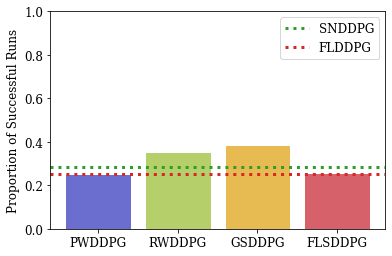

Time


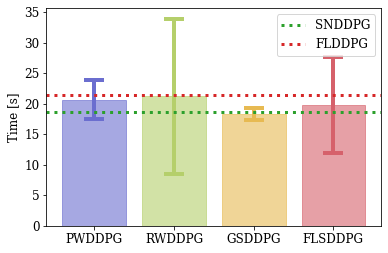

Distance factor


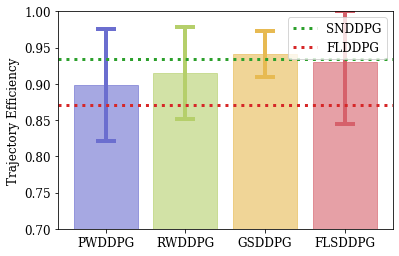

In [16]:
# pre-work
identifiers_long = [
    'SNWDDPG', 
    'FLWDDPG', 
    'PWDDPG', 
    'RWDDPG', 
    'GSDDPG', 
    'FLSDDPG', 
]
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')
C = 4
BASE = 2
s_w_p = np.array(s_w_p)

# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[0], s_p[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[1], s_p[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], s_p[BASE:])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
#plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.legend()
plt.savefig('eval_imp_success.png', dpi=200)
plt.show()

# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[0], t_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[1], t_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], t_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
#plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Time [s]')
plt.legend()
plt.savefig('eval_imp_time.png', dpi=200)
plt.show()

# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[0], d_m[0]], linestyle=':', linewidth=3, c=base_colors(2), label='SNDDPG')
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[1], d_m[1]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], d_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    if index == len(identifiers_long) - 1:
        #ax.errorbar(index-2, d_m[index], 1, lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
        err_plus = 1 - d_m[index]
        plt.errorbar([index-2], [d_m[index]], np.array([[d_s[index]], [err_plus]]), elinewidth=4, capsize=10, capthick=4, ecolor=colors((index-2)*C+2))
    else:
    #ax.errorbar(index-2, d_m[index], (d_s[index], 1), lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
        plt.errorbar(index-2, d_m[index], d_s[index], elinewidth=4, capsize=10, capthick=4, ecolor=colors((index-2)*C+2))
#plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0.7, 1)
plt.legend()
plt.savefig('eval_imp_distance.png', dpi=200)
plt.show()

## Improvements Best Network

In [100]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'FL', 
]
identifiers_long = [
    'FLDDPG', 
]
individual_count = [
    8,
]
network_count = [
    [2, 3, 0, 0, 3, 0, 1, 0],
]
world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

s_p = []
s_w_p = []
t_m = []
t_s = []
d_m = []
d_s = []

for id, iid in enumerate(identifiers):
    succeded_world = np.zeros(world_count)
    steps = np.array([])
    distances = np.array([])
    for inid, nid in enumerate(network_count[id]):
        # evaluation results
        succeded_world_n, steps_n, distances_n = get_evaluation(path_data, iid+str(nid), 
                                                        inid+1, world_count, experiment_count,
                                                        single=True)
        #print(iid+str(nid), '    ', inid+1)
        succeded_world += succeded_world_n
        steps = np.concatenate((steps, steps_n))
        distances = np.concatenate((distances, distances_n))
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

FLDDPG :
    Success rate: 0.484375
    World success rate: [0.125  0.75   0.375  0.6875]
    Time: 20.30322580645161 +- 3.6656631553330548
    Distance rate: 0.8672852191271406 +- 0.11329256486746886


In [101]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

identifiers = [
    'PW', 
    'RW', 
    'GS', 
    'FLS', 
]
identifiers_long = [
    'PWDDPG', 
    'RWDDPG', 
    'GSDDPG', 
    'FLSDDPG', 
]
individual_count = [
    8,
    8,
    8,
    8,
]
network_count = [
    [1, 0, 1, 0, 1, 1, 0, 3],
    [0, 0, 0, 0, 4, 2, 0, 1],
    [2, 0, 0, 2, 0, 0, 0, 0],
    [0, 3, 3, 2, 2, 0, 1, 0],
]
world_count = 4
experiment_count = 4
distance_optimal = np.linalg.norm(np.array([5, 5])) - 0.5

for id, iid in enumerate(identifiers):
    succeded_world = np.zeros(world_count)
    steps = np.array([])
    distances = np.array([])
    for inid, nid in enumerate(network_count[id]):
        # evaluation results
        succeded_world_n, steps_n, distances_n = get_evaluation(path_data, iid+str(nid), 
                                                        inid+1, world_count, experiment_count,
                                                        single=True)
        #print(iid+str(nid), '    ', inid+1)
        succeded_world += succeded_world_n
        steps = np.concatenate((steps, steps_n))
        distances = np.concatenate((distances, distances_n))
    # compute results
    total_count = individual_count[id] * world_count * experiment_count
    succeded_world_percentage = succeded_world / (individual_count[id] * experiment_count)
    s_w_p.append(succeded_world_percentage)
    succeded_percentage = np.sum(succeded_world_percentage) / world_count
    s_p.append(succeded_percentage)
    time_mean = np.mean(steps / 10)
    t_m.append(time_mean)
    time_std = np.std(steps / 10)
    t_s.append(time_std)
    distances = distance_optimal / distances
    distances_mean = np.mean(distances)
    d_m.append(distances_mean)
    distances_std = np.std(distances)
    d_s.append(distances_std)
    # print results
    print(identifiers_long[id], ':')
    print('    Success rate:', succeded_percentage)
    print('    World success rate:', succeded_world_percentage)
    print('    Time:', time_mean, '+-', time_std)
    print('    Distance rate:', distances_mean, '+-', distances_std)

PWDDPG :
    Success rate: 0.453125
    World success rate: [0.     0.625  0.5    0.6875]
    Time: 20.520689655172415 +- 2.836812114443183
    Distance rate: 0.9062033965350589 +- 0.07204228640493804
RWDDPG :
    Success rate: 0.4765625
    World success rate: [0.     0.7188 0.3438 0.8438]
    Time: 21.086885245901634 +- 12.416138036480179
    Distance rate: 0.9235415578775122 +- 0.05353630619012561
GSDDPG :
    Success rate: 0.40625
    World success rate: [0.     0.4062 0.7188 0.5   ]
    Time: 18.23653846153846 +- 1.0383101741538892
    Distance rate: 0.9407186603879448 +- 0.03408359722674191
FLSDDPG :
    Success rate: 0.453125
    World success rate: [0.     0.6562 0.3125 0.8438]
    Time: 18.953448275862065 +- 2.3889267188455716
    Distance rate: 0.9405882096727637 +- 0.050233976804552646


Success rate


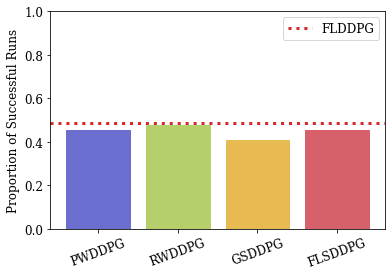

Time


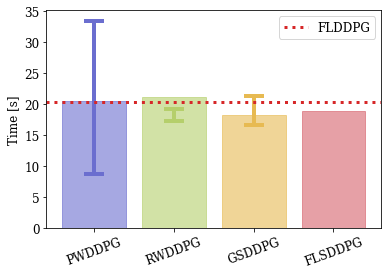

Distance factor


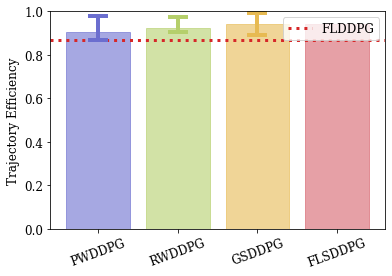

In [103]:
# pre-work
identifiers_long = [
    'FLDDPG', 
    'PWDDPG', 
    'RWDDPG', 
    'GSDDPG', 
    'FLSDDPG', 
]
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')
C = 4
BASE = 1
s_w_p = np.array(s_w_p)

# percentages
print('Success rate')
plt.figure(figsize=(6, 4))
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [s_p[0], s_p[0]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], s_p[BASE:])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
plt.ylim(0, 1)
plt.ylabel('Proportion of Successful Runs')
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.legend()
#plt.savefig('eval_imp_success.png', dpi=200)
plt.show()

# times
print('Time')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [t_m[0], t_m[0]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], t_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, t_m[index], t_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Time [s]')
plt.legend()
#plt.savefig('eval_imp_time.png', dpi=200)
plt.show()

# distances
print('Distance factor')
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.plot([-0.6, len(identifiers_long[BASE:]) - 1 + 0.6], [d_m[0], d_m[0]], linestyle=':', linewidth=3, c=base_colors(3), label='FLDDPG')
bar_list = plt.bar(identifiers_long[BASE:], d_m[BASE:], alpha=0.6)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
for index in range(BASE, len(identifiers_long)):
    ax.errorbar(index-2, d_m[index], d_s[index], lw=4, capsize=10, capthick=4, color=colors((index-2)*C+2))
plt.xticks(rotation=20)
plt.xlim(-0.6, len(identifiers_long[BASE:]) - 1 + 0.6)
plt.ylabel('Trajectory Efficiency')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('eval_imp_distance.png', dpi=200)
plt.show()

## One run

In [41]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'
path_name = 'EVAL-1-SNms-4'
GOAL = 12

finished = np.load(path_data + '/' + path_name + '/log/finished-{}.npy'.format(GOAL))
succeded = np.load(path_data + '/' + path_name + '/log/succeded-{}.npy'.format(GOAL))
with open(path_data + '/' + path_name + '/log/data-{}.pkl'.format(GOAL), 'rb') as f:
    data = pickle.load(f)


<function matplotlib.pyplot.show(*args, **kw)>

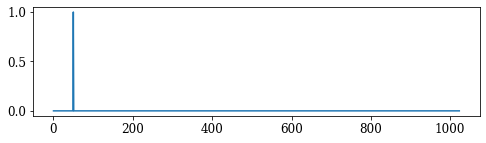

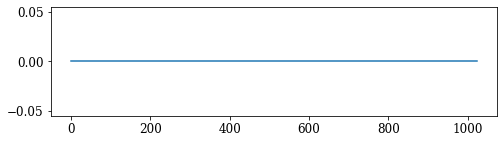

In [42]:
plt.figure(figsize=(8, 2))
plt.plot(finished)
plt.show
plt.figure(figsize=(8, 2))
plt.plot(succeded)
plt.show

(-6, 6)

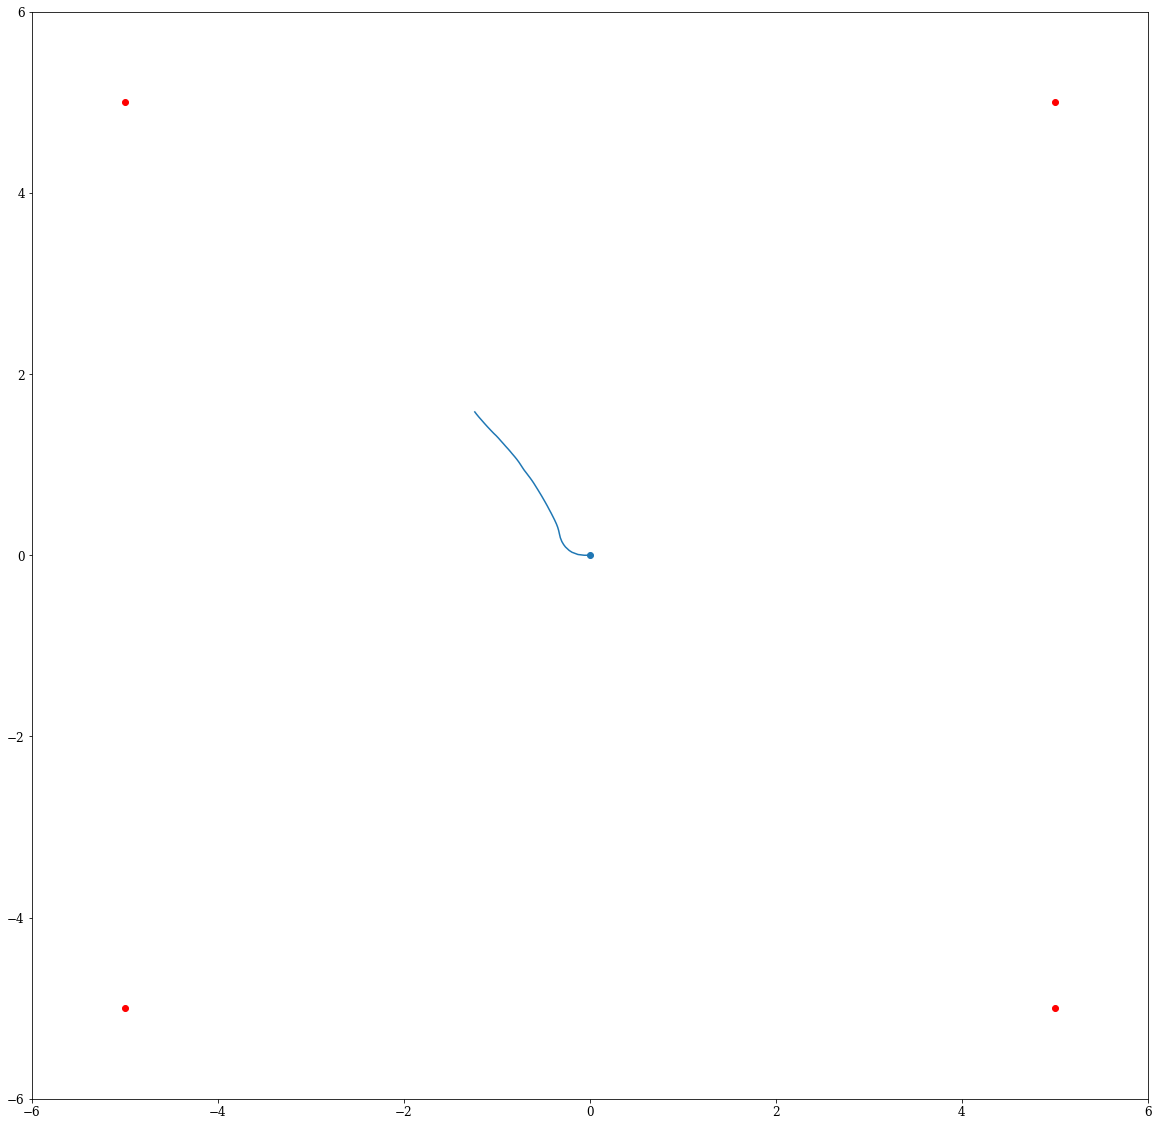

In [45]:
plt.figure(figsize=(20, 20))
plt.scatter([0], [0])
plt.scatter([5, 5, -5, -5], [-5, 5, -5, 5], c='red')

# Picture
# 0 2
# 1 3

x = []
y = []
for dat in data:
    x.append(dat['x'])
    y.append(dat['y'])
x = np.array(x)
y = np.array(y)

plt.set_cmap('viridis')
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-6, 6)

In [5]:
a = np.array([0.5, 1,1,1])
m = np.mean(a)
s = np.std(a)
print(m)
print(s)
print(m + s)

0.875
0.21650635094610965
1.0915063509461096


In [72]:
a = np.array([])
b = np.array([1,2,3])
np.concatenate((a,b))

array([1., 2., 3.])